<a href="https://colab.research.google.com/github/pateldevansh2612/RestAuthentication/blob/master/bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yadavyogesh007","key":"f82645c1feb8b275e63b679034e5c4da"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.36G/1.37G [00:15<00:00, 94.0MB/s]
100% 1.37G/1.37G [00:15<00:00, 92.9MB/s]


In [ ]:
import os
os.mkdir("data")  

In [ ]:
from zipfile import ZipFile
file_name = "100-bird-species.zip"
with ZipFile(file_name,"r") as zip:
  zip.extractall('/content/data/')
  print("done")

done


In [ ]:
test_dir="/content/datasets/test"
train_dir="/content/datasets/train"

In [ ]:
import glob
training_list=list(glob.glob("/content/data/train/*/*.jpg"))

In [ ]:
len(training_list)

31316

In [ ]:
import tqdm.notebook as tq
from tqdm.auto import tqdm
import cv2 

In [ ]:
training_data=[]
for i in range(1,len(training_list[:40])+1):
        img_array = cv2.imread(training_list[i] ,0) 
        new_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) 
        training_data.append(new_array)

In [ ]:
a=training_data[0]

In [ ]:
b=image1

In [ ]:
a == b

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

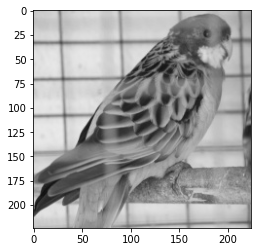

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image21 = cv2.imread(training_list[0] ,0) 
image1 = cv2.cvtColor(image21, cv2.COLOR_BGR2RGB)
plt.imshow(image1)

In [ ]:
import numpy as np

training_data=np.array(training_data).reshape(-1,224,224,3)

In [ ]:
training_data.shape[1:]

(224, 224, 3)

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score,roc_curve
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
%matplotlib inline

In [ ]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3, 3), input_shape=training_data.shape[1:], activation='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 93312)             0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 93312)           

In [ ]:
training_data.ndim

4

In [ ]:
model.fit(x=training_data,epochs=10,validation_split=0.1)

Epoch 1/10


ValueError: ignored

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=training_data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), input_shape=training_data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
train_dir="/content/data"
# val_dir="/content/data/valid"
# test_dir="/content/data/test"
img_width=100
img_height=100
batch_size=10



datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# val_generator = datagen.flow_from_directory(
#     val_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='binary')

# test_generator = datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='binary')

Found 33566 images belonging to 4 classes.
